# Task 1:

This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [17]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [18]:
print(titanic.head())
print(titanic['sex'].value_counts())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

### Charts to plot:
1. Create a pie chart presenting the male/female proportion

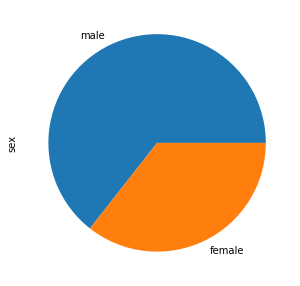

In [19]:
plot = titanic['sex'].value_counts().plot.pie(figsize=(5, 5))

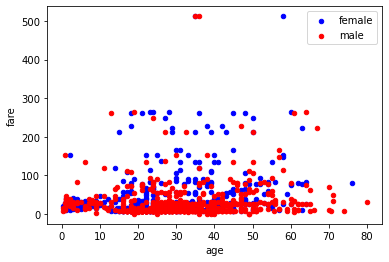

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots()

colors = {'male':'red', 'female':'blue'}

grouped = titanic.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='fare', label=key, color=colors[key])

plt.show()

# Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})


In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
 '12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [2]:
for i in range(len(df)):
    if pd.isna(df['FlightNumber'][i]):
        df.loc[i, 'FlightNumber'] = df.loc[i-1, 'FlightNumber'] + float(10)

2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [3]:
df[['From', 'To']] = df.From_To.str.split('_', expand=True)
df['FlightNumber'] = df['FlightNumber'].astype(int)

3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [4]:
def camel_case(x):
    return x[0].upper() + x[1:].lower()


df['From'] = df['From'].apply(camel_case)
df['To'] = df['To'].apply(camel_case)

4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [5]:
df = df.drop(['From_To'], axis=1)

5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [6]:
def joinlist(x):# converting list to string
    seq = ''
    for element in x:
        seq = seq + str(element) +','
    return seq.strip(',')


df['RecentDelays'] = df['RecentDelays'].apply(joinlist)
df = df.join(df['RecentDelays'].str.split(',', expand=True).add_prefix('delay_')).fillna(np.nan)# expanding the string
df = df.drop('RecentDelays', axis=1)
print(df)

   FlightNumber              Airline      From         To delay_0 delay_1  \
0         10045               KLM(!)    London      Paris      23      47   
1         10055    <Air France> (12)    Madrid      Milan             NaN   
2         10065  (British Airways. )    London  Stockholm      24      43   
3         10075       12. Air France  Budapest      Paris      13     NaN   
4         10085          "Swiss Air"  Brussels     London      67      32   

  delay_2  
0     NaN  
1     NaN  
2      87  
3     NaN  
4     NaN  
